In [65]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2

In [66]:
#wczytaj jpg
image_path = "C:/Users/matiu/Downloads/CFA_BIN (2)/CFA/Bayer/namib.jpg"
image = cv2.imread(image_path)

#przekształć na float64
image_float64 = image.astype('float64') / 255.0

#zapisz jako plik .npy
output_path = "C:/Users/matiu/OneDrive/Pulpit/SiOC/Bayer/nami.npy"
np.save(output_path, image_float64)


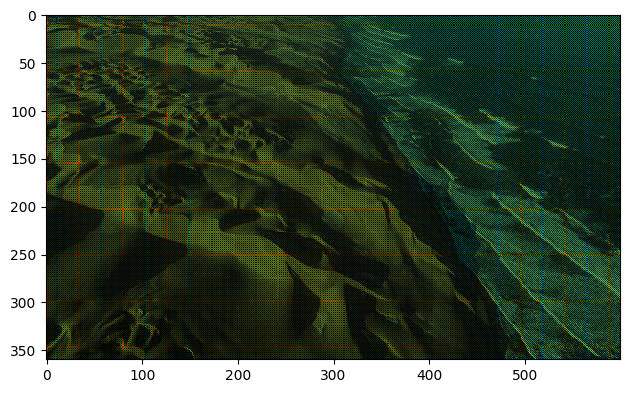

In [67]:
obraz = np.load("C:/Users/matiu/Downloads/CFA_NPY/CFA_NPY/Bayer/namib.npy")
io.imshow(obraz)

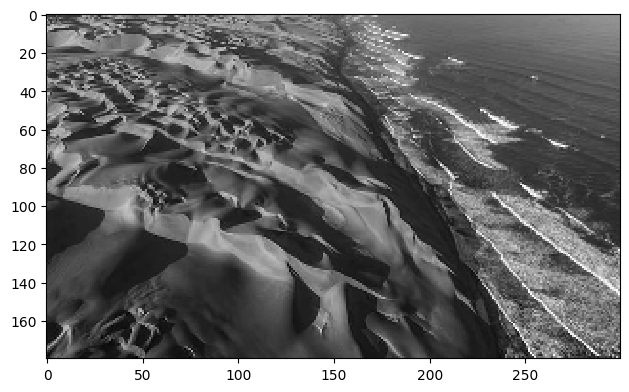

In [86]:
interpolacja = zielony
interpolacja = zielony[::2,:]
interpolacja = interpolacja[:, ::2]
io.imshow(interpolacja)

In [87]:
def interpoluj_rzad(rzad):
    jadra = []
    space = np.linspace(0, 1, 2 * len(rzad))
    
    for x, y in zip(space.tolist(), rzad.tolist()):
        jadro = liniowy_kernel(space, offset=2 * x, width=1 / len(rzad))
        jadra.append(y * jadro)
    return space, np.sum(np.asarray(jadra), axis=0)

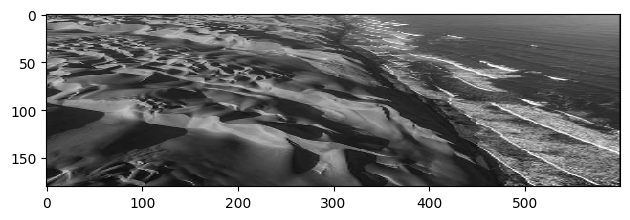

In [97]:
iterpolowane = []
for rzad in interpolacja:
    _, i = interpoluj_rzad(rzad)
    iterpolowane.append(i)

iterpolowane = np.asarray(iterpolowane)
io.imshow(iterpolowane)
iterpolowane2 = []

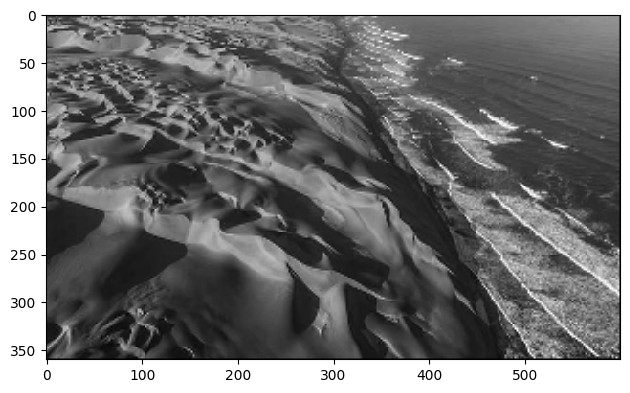

In [98]:
for kolumna in iterpolowane.T:
    _, i = interpoluj_rzad(kolumna)
    iterpolowane2.append(i)

iterpolowane2 = np.asarray(iterpolowane2).T
zielonyw = iterpolowane2
io.imshow(iterpolowane2)

In [99]:
zielonyw = iterpolowane2

In [100]:
czerwony_rzad = []
for rzad in czerwony[::2]:
    _, i = interpoluj_rzad(rzad[1::2])
    czerwony_rzad.append(i)
czerwony_rzad = np.asarray(czerwony_rzad)

In [101]:
czerwona_kol = []
for kolumna in czerwony_rzad.T:
    _, i = interpoluj_rzad(kolumna)
    czerwona_kol.append(i)

czerwona_kol = np.asarray(czerwona_kol)
czerwona_kol.T.shape
czerwonyw = czerwona_kol

In [102]:
niebieski_rzad = []
for rzad in niebieski[1::2]:
    _, i = interpoluj_rzad(rzad[::2])
    niebieski_rzad.append(i)
niebieski_rzad = np.asarray(niebieski_rzad)

In [103]:
niebieska_kol = []
for kolumna in niebieski_rzad.T:
    _, i = interpoluj_rzad(kolumna)
    niebieska_kol.append(i)
niebieska_kol = np.asarray(niebieska_kol)
niebieska_kol.T.shape

niebieskiw = niebieska_kol

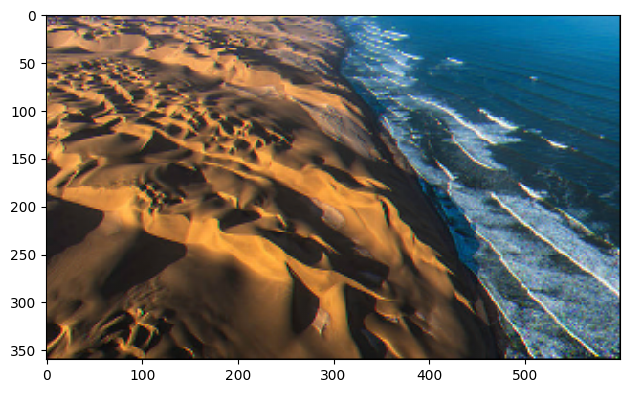

In [104]:
obraz_koncowy = np.dstack([czerwonyw.T, zielonyw, niebieskiw.T])
io.imshow(obraz_koncowy)